# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
! pip install fabric

In [2]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [3]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'TEMP'
server_password='TEMP'
db_user='TEMP'
db_pass='TEMP'

In [4]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

In [5]:
exchange="N" #nasdaq 
symbol='AAPL'
start= "2020-01-15"
end="2020-01-30"


In [6]:
result=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Trade Query for N AAPL 2020-01-15 2020-01-30


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [7]:
trades=pd.read_csv('data/AAPL_trades.csv',nrows=10000)
trades=clean_trades(trades)
trades.to_csv('data/cleaned_trades.csv')
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2020-01-15 09:30:01.004096,2020-01-15 09:30:01.004475,N,AAPL,100,311.94,@F,N,0,25659,5,,1,2020-01-15
2020-01-15 09:30:01.100463,2020-01-15 09:30:01.100841,N,AAPL,3,311.91,@F I,N,0,26087,6,,1,2020-01-15
2020-01-15 09:30:01.438061,2020-01-15 09:30:01.438450,N,AAPL,10,311.89,@ I,N,0,26776,7,,0,2020-01-15
2020-01-15 09:30:01.438068,2020-01-15 09:30:01.438451,N,AAPL,46,311.89,@ I,N,0,26777,8,,0,2020-01-15
2020-01-15 09:30:01.677976,2020-01-15 09:30:01.678356,N,AAPL,1,311.95,@ I,N,0,27223,9,,0,2020-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-17 09:39:08.500600,2020-01-17 09:39:08.500981,N,AAPL,200,315.66,@F,N,0,139420,355,,1,2020-01-17
2020-01-17 09:39:08.890641,2020-01-17 09:39:08.891019,N,AAPL,20,315.69,@ I,N,0,139541,356,,0,2020-01-17
2020-01-17 09:39:09.152079,2020-01-17 09:39:09.152456,N,AAPL,100,315.66,@,N,0,139673,357,,0,2020-01-17
2020-01-17 09:39:09.984181,2020-01-17 09:39:09.984559,N,AAPL,100,315.63,@F,N,0,139778,358,,1,2020-01-17


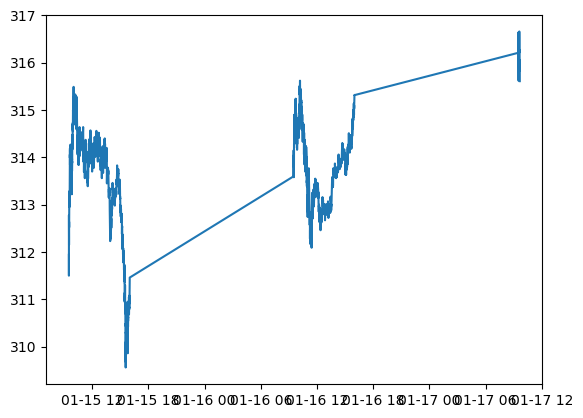

In [8]:
plt.plot(trades['Trade_Price'])

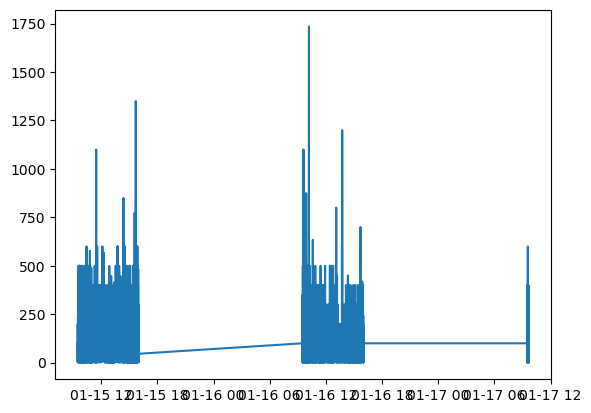

In [9]:
plt.plot(trades['Trade_Volume'])

### Example Quote Query

Note there are not any cancel corrections within quote data so far as described in TAQ

In [10]:
exchange="N"
symbol='AAPL'
start= "2020-01-15"
end="2020-01-30"


In [11]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [12]:
result=conn.client_get_quotes(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Quote Query for N AAPL 2020-01-15 2020-01-30


INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


Load in first 20000 top of book quotes 

In [18]:
quotes=pd.read_csv("data/AAPL_quotes.csv",nrows=20000) 

# ts realignment based on participant ts and dropping invalid observations 
quotes=clean_quotes(quotes)

quotes.to_csv('data/cleaned_quotes.csv')

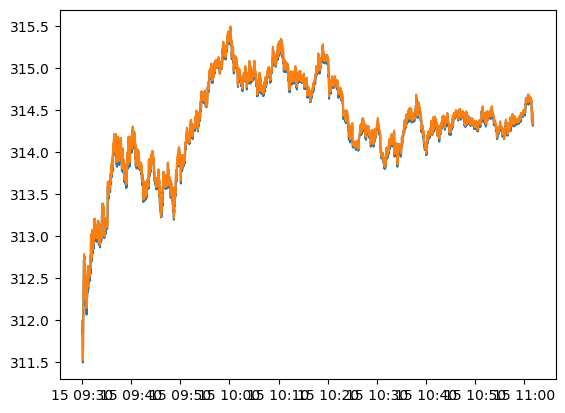

In [19]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

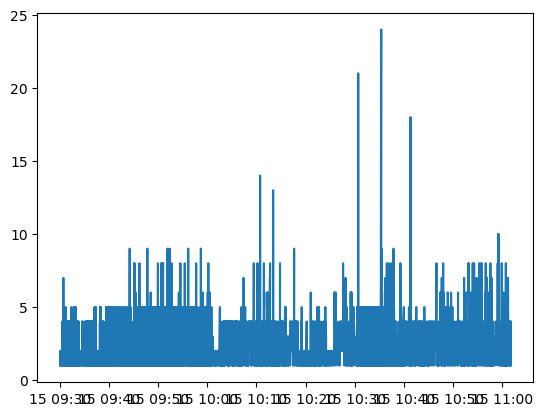

In [20]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
